#### Data Science Assignment: eCommerce Transactions Dataset 
Overview: 
#### You are provided with an eCommerce Transactions dataset consisting of three files: Customers.csv, Products.csv, and Transactions.csv. Your task is to perform exploratory data analysis (EDA), build predictive models, and derive actionable insights. This assignment will test your data analysis, machine learning, and business insight generation skills. 
* Customers.csv: 
https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view?usp=sharing
* Products.csv : 
https://drive.google.com/file/d/1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0/view?usp=sharing 
* Transactions.csv : 
https://drive.google.com/file/d/1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF/view?usp=sharing

* Files Description: 
1. Customers.csv 
* CustomerID: Unique identifier for each customer. 
* CustomerName: Name of the customer. 
* Region: Continent where the customer resides. 
* SignupDate: Date when the customer signed up. 
2. Products.csv 
* ProductID: Unique identifier for each product. 
* ProductName: Name of the product. 
* Category: Product category. 
* Price: Product price in USD. 
3. Transactions.csv 
* TransactionID: Unique identifier for each transaction. 
* CustomerID: ID of the customer who made the transaction. 
* ProductID: ID of the product sold. 
* TransactionDate: Date of the transaction.
* Quantity: Quantity of the product purchased. 
* TotalValue: Total value of the transaction. 
* Price: Price of the product sold. 
Assignment Tasks: 
Task 1: Exploratory Data Analysis (EDA) and Business Insights 
- 1. Perform EDA on the provided dataset. 
- 2. Derive at least 5 business insights from the EDA. 
○ Write these insights in short point-wise sentences (maximum 100 words per insight). 
Deliverables: 
* A Jupyter Notebook/Python script containing your EDA code. 
* A PDF report with business insights (maximum 500 words). 


#### Step 1: Load the Data

In [13]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

#### Step 2: Data Cleaning

##### Check for missing values:

In [17]:
print("Missing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


##### Check for duplicate rows:

In [21]:
print("Duplicates in Customers:", customers.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())
print("Duplicates in Transactions:", transactions.duplicated().sum())


Duplicates in Customers: 0
Duplicates in Products: 0
Duplicates in Transactions: 0


#### Summary of Cleaning
- Missing Values:

- No missing values were found in any of the datasets (Customers, Products, Transactions).
Duplicate Rows:

- No duplicate rows exist in any of the datasets.

#### Verify Column Data Types

In [38]:
# Check data types of customers dataset
print(customers.dtypes)

# Check data types of transactions dataset
print(transactions.dtypes)


CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


#### Inspect the first few rows of the datetime columns:

In [41]:
print(customers['SignupDate'].head())
print(transactions['TransactionDate'].head())


0   2022-07-10
1   2022-02-13
2   2024-03-07
3   2022-10-09
4   2022-08-15
Name: SignupDate, dtype: datetime64[ns]
0   2024-08-25 12:38:23
1   2024-05-27 22:23:54
2   2024-04-25 07:38:55
3   2024-03-26 22:55:37
4   2024-03-21 15:10:10
Name: TransactionDate, dtype: datetime64[ns]


#### Feature Engineering on Dates

In [52]:
# Adding the new column to calculate days since signup
transactions['DaysSinceSignup'] = (transactions['TransactionDate'] - 
                                   transactions['CustomerID'].map(
                                       customers.set_index('CustomerID')['SignupDate']
                                   )).dt.days

# Display the first few rows of the transactions DataFrame to verify the new column
print(transactions.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price  DaysSinceSignup  
0      300.68  300.68              631  
1      300.68  300.68             -100  
2      300.68  300.68               21  
3      601.36  300.68              -16  
4      902.04  300.68              737  


#### Identify Transactions with Negative DaysSinceSignup:

In [55]:
negative_days = transactions[transactions['DaysSinceSignup'] < 0]
print("Transactions with negative DaysSinceSignup:")
print(negative_days)


Transactions with negative DaysSinceSignup:
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
18         T00358      C0154      P034 2024-04-08 20:47:01         1   
20         T00546      C0049      P034 2024-08-30 06:42:27         1   
22         T00003      C0028      P057 2024-01-25 14:28:34         4   
..            ...        ...       ...                 ...       ...   
979        T00318      C0098      P046 2024-01-09 16:35:54         1   
990        T00624      C0105      P077 2024-08-03 23:04:47         4   
994        T00408      C0054      P037 2024-08-15 03:03:51         2   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   

     TotalValue   Price  DaysSinceSignup  
1        300.68  300.68             -100  
3    

#### Check Customer Signup Dates for Affected Transactions

In [58]:
negative_customers = transactions[transactions['DaysSinceSignup'] < 0]['CustomerID'].unique()
customer_signup_dates = customers[customers['CustomerID'].isin(negative_customers)][['CustomerID', 'SignupDate']]
print(customer_signup_dates)


    CustomerID SignupDate
2        C0003 2024-03-07
11       C0012 2024-08-07
12       C0013 2024-05-19
13       C0014 2024-06-22
17       C0018 2024-09-21
..         ...        ...
182      C0183 2024-01-23
186      C0187 2024-08-02
189      C0190 2024-05-31
193      C0194 2024-05-04
194      C0195 2024-09-17

[62 rows x 2 columns]


#### Verify Transaction Dates

In [61]:
affected_transactions = transactions[transactions['CustomerID'].isin(negative_customers)]
print(affected_transactions[['TransactionID', 'CustomerID', 'TransactionDate', 'DaysSinceSignup']])


    TransactionID CustomerID     TransactionDate  DaysSinceSignup
1          T00112      C0146 2024-05-27 22:23:54             -100
2          T00166      C0127 2024-04-25 07:38:55               21
3          T00272      C0087 2024-03-26 22:55:37              -16
6          T00490      C0195 2024-11-24 11:49:48               68
13         T00002      C0092 2024-12-16 03:31:07              201
..            ...        ...                 ...              ...
990        T00624      C0105 2024-08-03 23:04:47             -100
994        T00408      C0054 2024-08-15 03:03:51              -45
996        T00759      C0059 2024-06-04 02:15:24               58
997        T00922      C0018 2024-04-05 13:05:32             -169
998        T00959      C0115 2024-09-29 10:16:02              -43

[323 rows x 4 columns]


#### Handling Negative Days in Data

In [74]:
transactions_clean = transactions[transactions['DaysSinceSignup'] >= 0]
print(transactions_clean.head())  # This will show the first few rows of the cleaned data


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   
5        T00442      C0188      P067 2024-12-26 14:40:03         1   
6        T00490      C0195      P067 2024-11-24 11:49:48         3   

   TotalValue   Price  DaysSinceSignup  
0      300.68  300.68              631  
2      300.68  300.68               21  
4      902.04  300.68              737  
5      300.68  300.68              954  
6      902.04  300.68               68  


#### Exploratory Data Analysis (EDA)

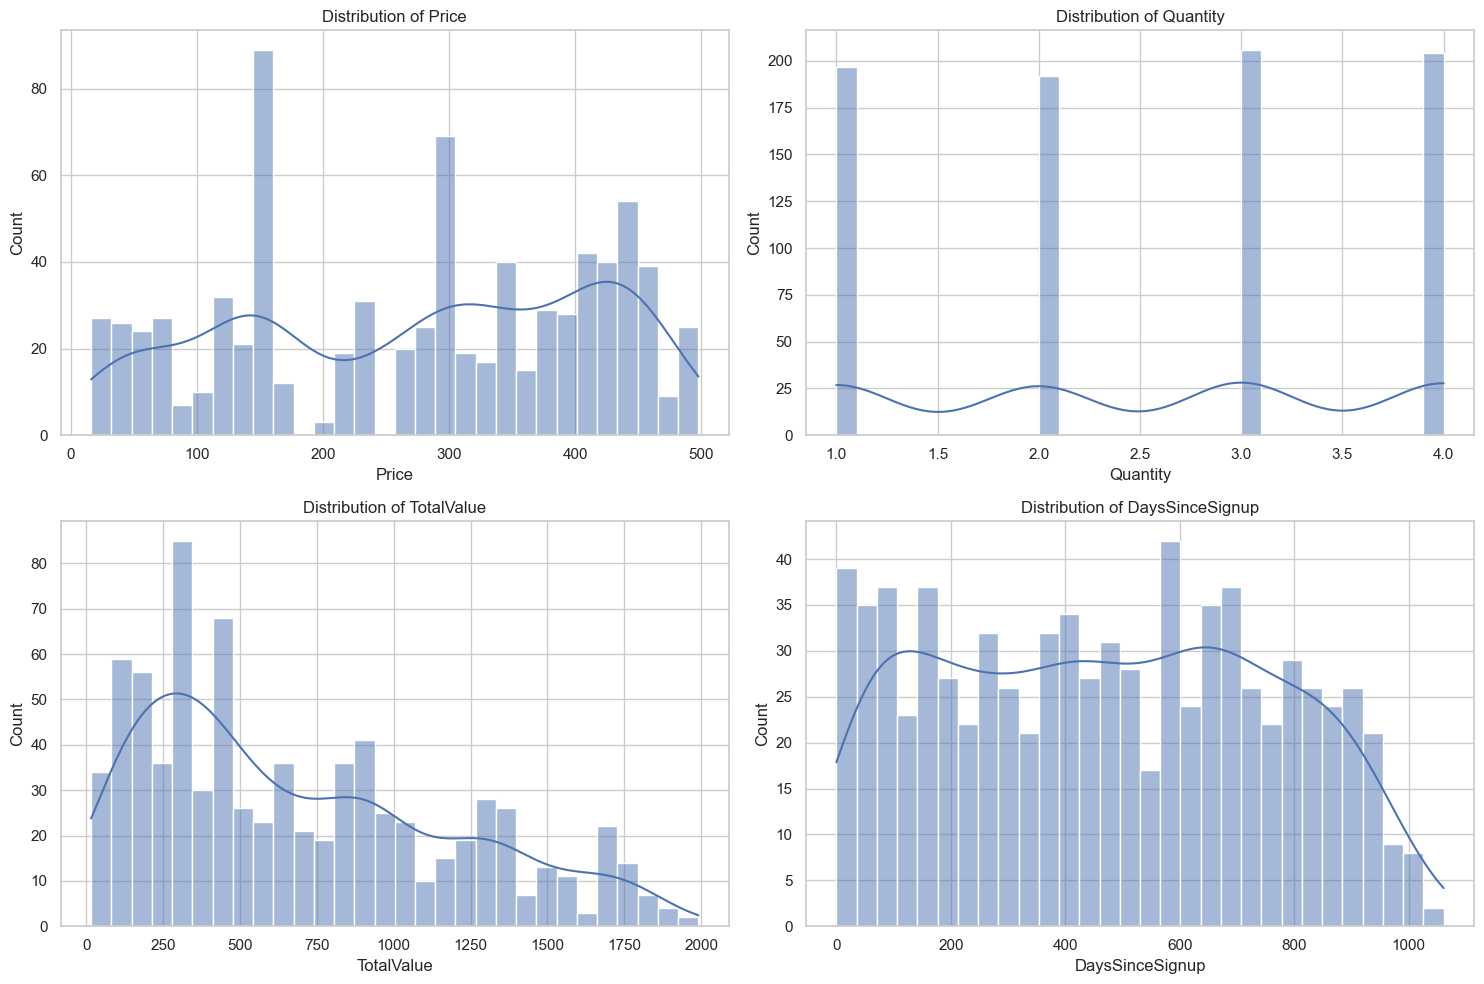

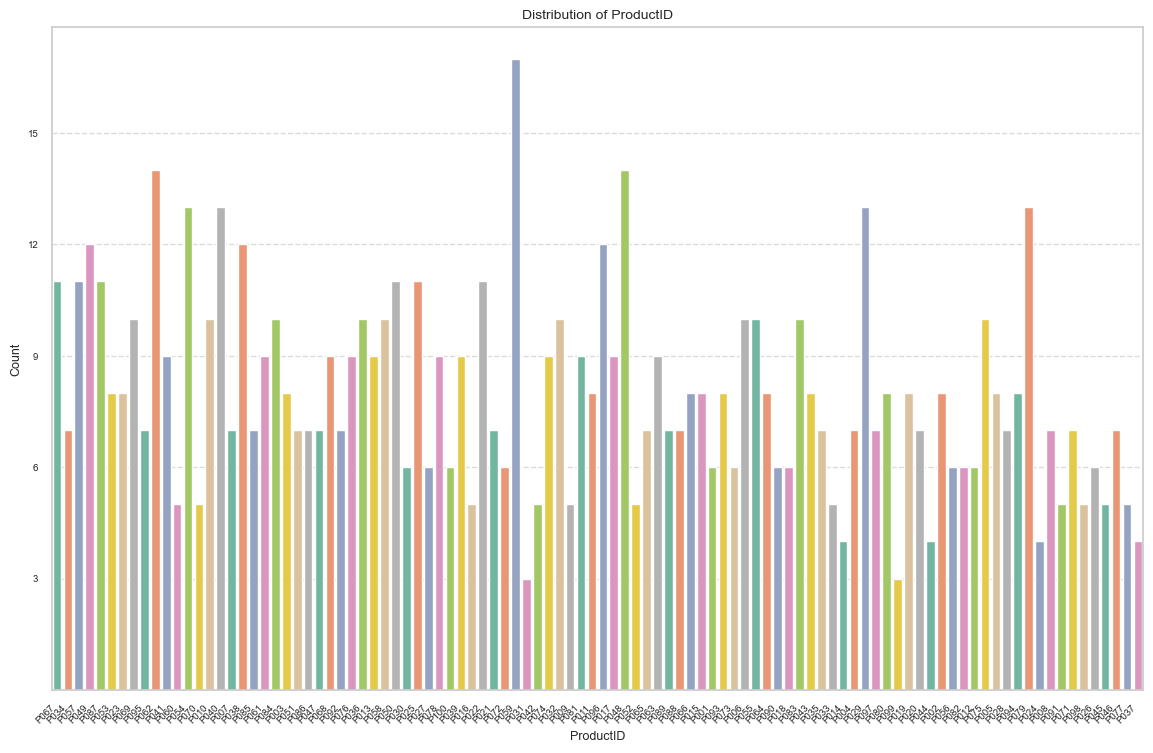

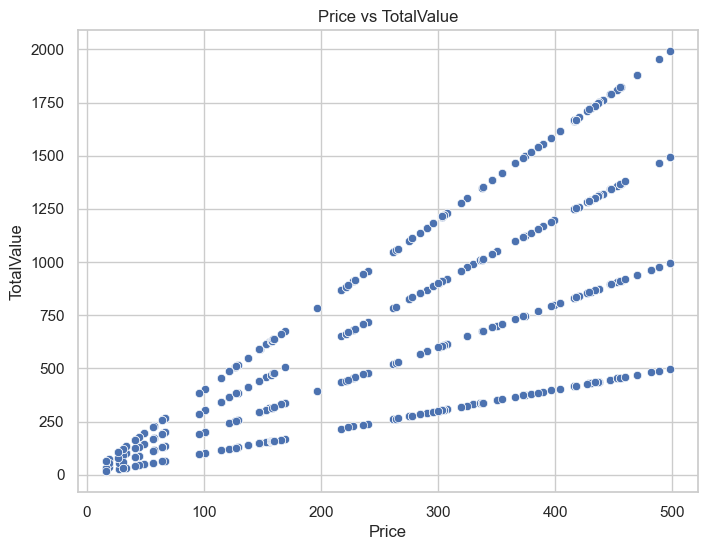

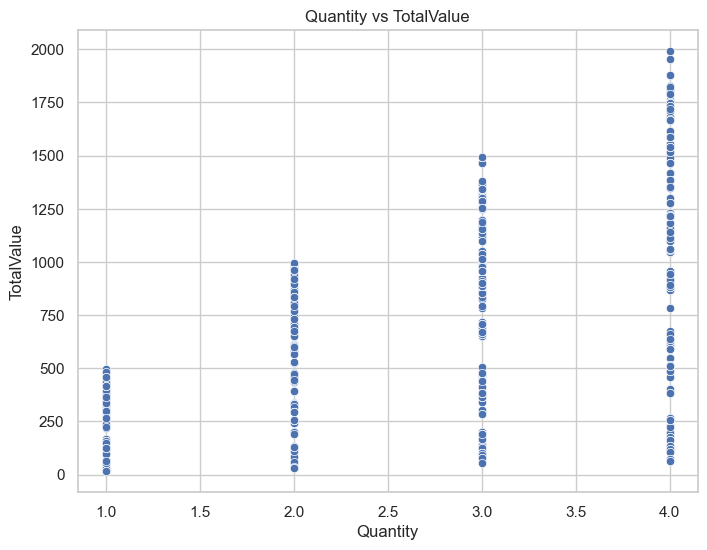

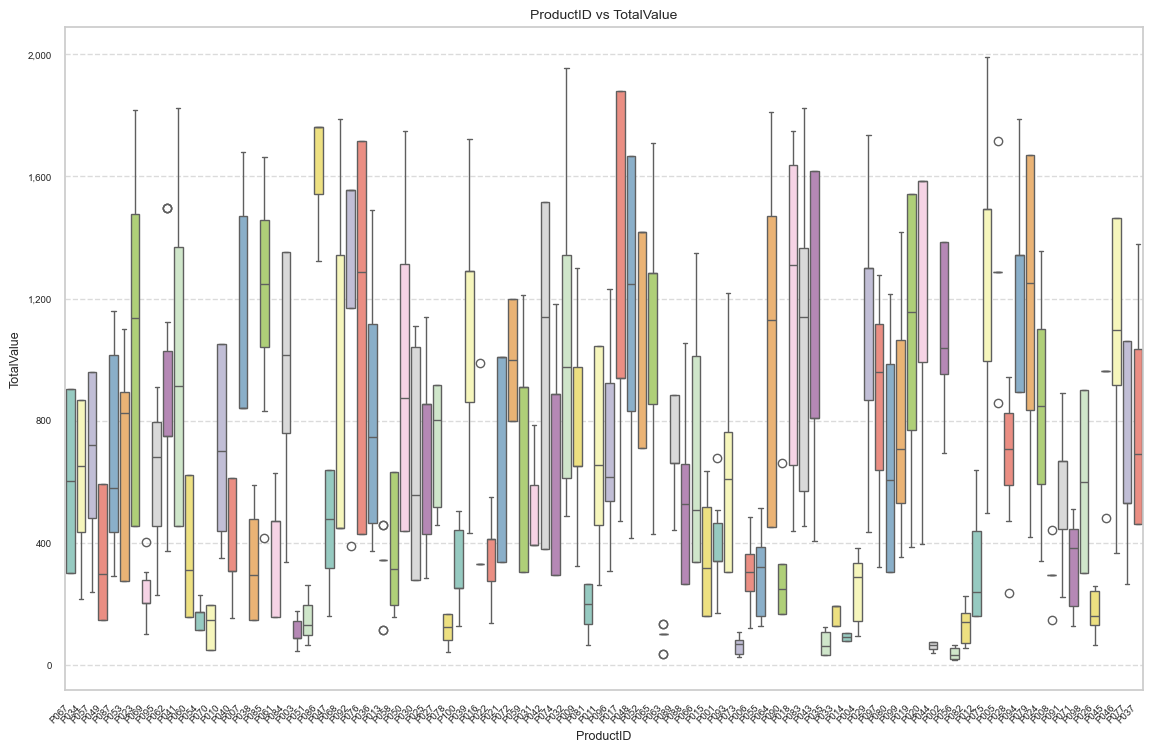

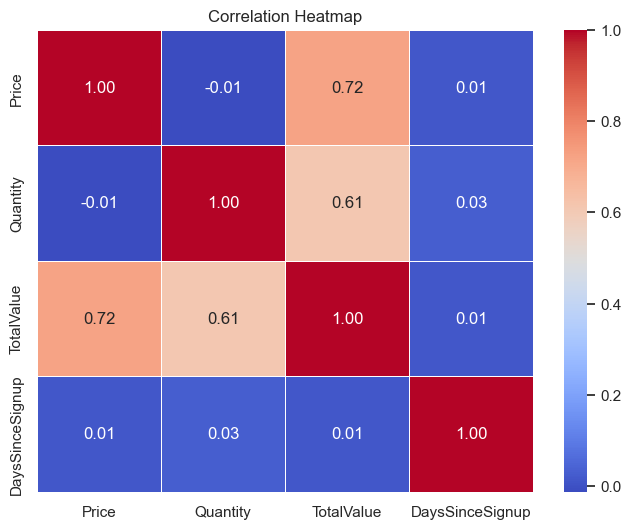

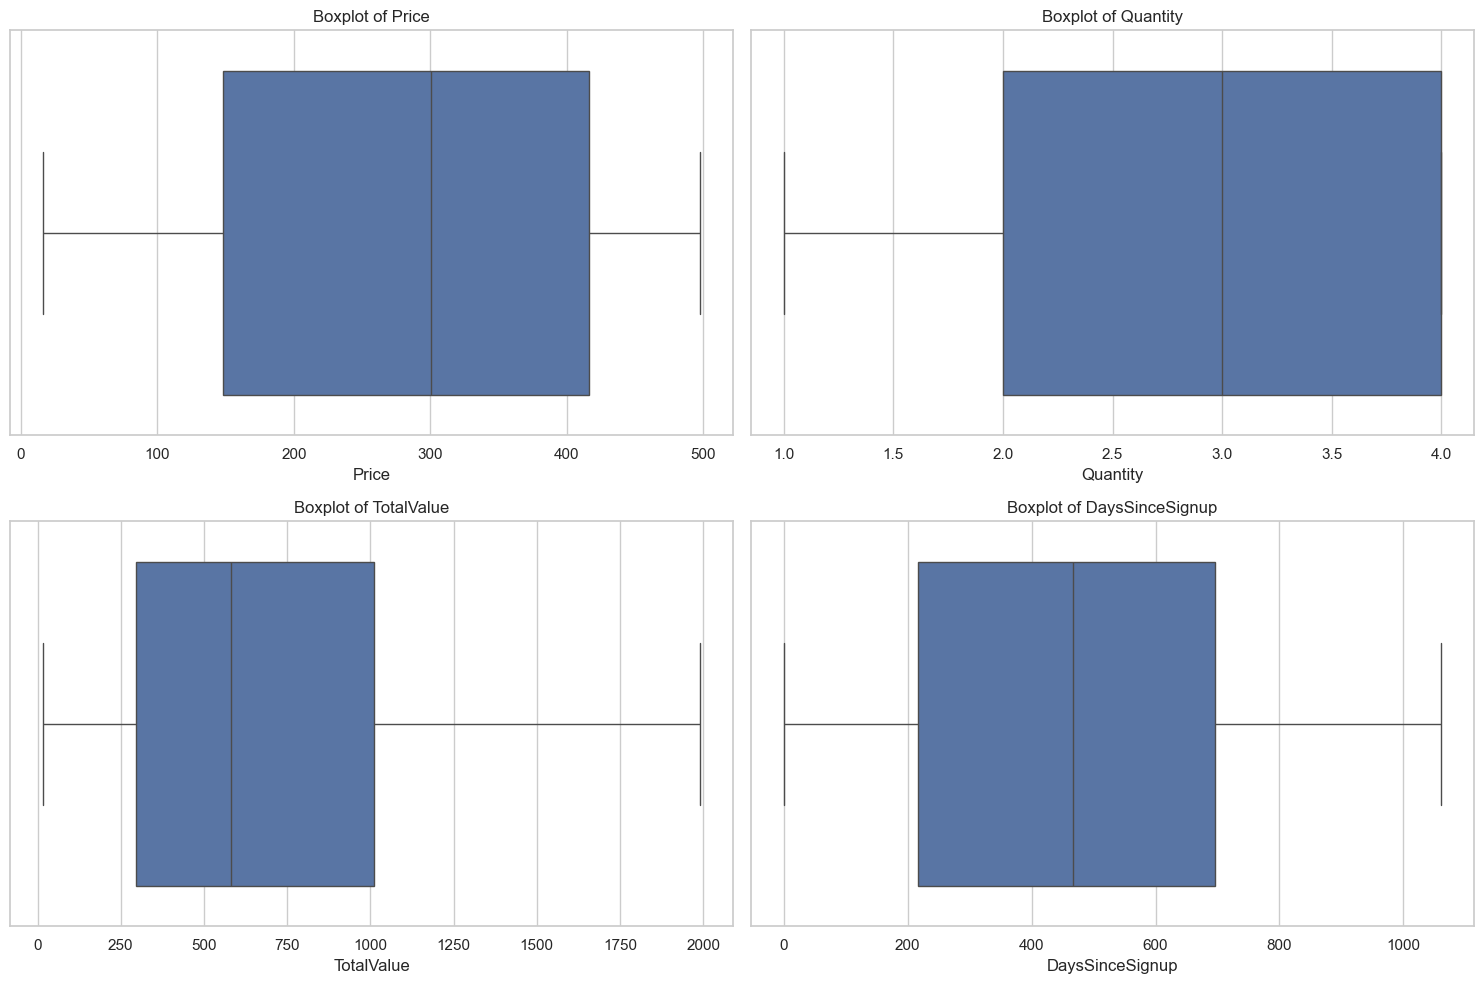

Outliers count in each column:
Price              0
Quantity           0
TotalValue         0
DaysSinceSignup    0
dtype: int64
Missing Values Count:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
DaysSinceSignup    0
dtype: int64


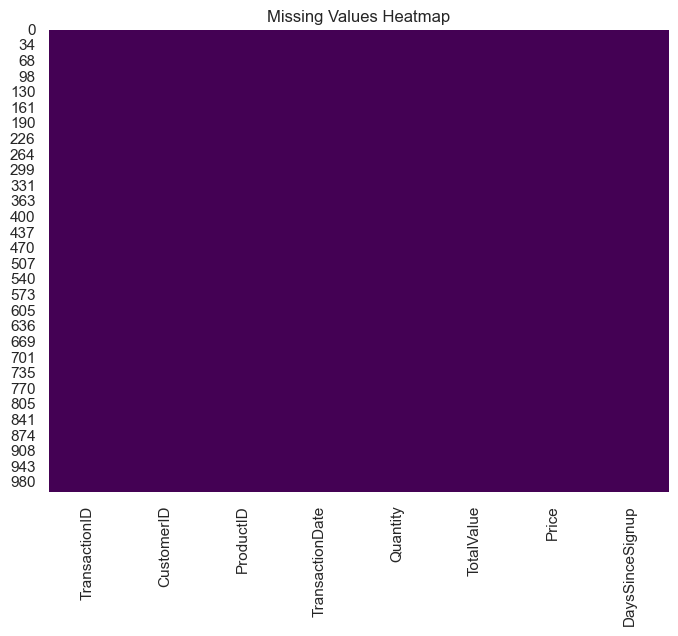

Summary Statistics for Numerical Variables:
            Price    Quantity   TotalValue  DaysSinceSignup
count  799.000000  799.000000   799.000000       799.000000
mean   273.840250    2.521902   688.644193       469.240300
std    141.012685    1.120199   494.049091       285.191208
min     16.080000    1.000000    16.080000         0.000000
25%    147.950000    2.000000   295.010000       216.000000
50%    300.680000    3.000000   580.340000       467.000000
75%    416.350000    4.000000  1009.590000       695.500000
max    497.760000    4.000000  1991.040000      1061.000000
Summary Statistics for Categorical Variables:
       ProductID
count        799
unique       100
top         P059
freq          17


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Assuming data is in 'transactions_clean' DataFrame

# 1. Univariate Analysis
# --------------------------------------

# 1.1 Distribution of Numerical Variables
numerical_columns = ['Price', 'Quantity', 'TotalValue', 'DaysSinceSignup']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(transactions_clean[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 1.2 Distribution of ProductID (Categorical Analysis)
plt.figure(figsize=(12, 8))  # Adjusted figure size for better readability
sns.countplot(x='ProductID', data=transactions_clean, hue='ProductID', palette='Set2', legend=False)

# Rotate x-axis labels and adjust font size slightly smaller
plt.xticks(rotation=45, ha='right', fontsize=7)  # Slightly smaller font size

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add title and labels with larger font size
plt.title('Distribution of ProductID', fontsize=10)
plt.xlabel('ProductID', fontsize=9)
plt.ylabel('Count', fontsize=9)

# Adjust the y-axis limits and format the y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='lower', nbins=6))  # Fewer ticks, tighter spacing
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format with commas

# Decrease font size of y-axis labels
plt.tick_params(axis='y', labelsize=7)  # Slightly smaller label size for y-axis

# Adjust the layout to make sure all labels fit well
plt.tight_layout(pad=2.0)  # Increased padding for better space between labels
plt.show()

# 2. Bivariate Analysis
# --------------------------------------

# 2.1 Price vs TotalValue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='TotalValue', data=transactions_clean)
plt.title('Price vs TotalValue')
plt.show()

# 2.2 Quantity vs TotalValue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='TotalValue', data=transactions_clean)
plt.title('Quantity vs TotalValue')
plt.show()

# 2.3 ProductID vs TotalValue (Categorical vs Numerical)
plt.figure(figsize=(12, 8))  # Adjusted figure size for tight space
sns.boxplot(x='ProductID', y='TotalValue', data=transactions_clean, hue='ProductID', palette='Set3', legend=False)

# Rotate x-axis labels and adjust font size slightly smaller
plt.xticks(rotation=45, ha='right', fontsize=7)  # Slightly smaller font size

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add title and labels with larger font size
plt.title('ProductID vs TotalValue', fontsize=10)
plt.xlabel('ProductID', fontsize=9)
plt.ylabel('TotalValue', fontsize=9)

# Adjust the y-axis limits and format the y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='lower', nbins=6))  # Fewer ticks, tighter spacing
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format large numbers with commas

# Decrease font size of y-axis labels
plt.tick_params(axis='y', labelsize=7)  # Slightly smaller label size for y-axis

# Adjust the layout to make sure all labels fit well
plt.tight_layout(pad=2.0)  # Increased padding for better space between labels
plt.show()

# 3. Correlation Analysis
# --------------------------------------

# 3.1 Correlation Heatmap for Numerical Variables
plt.figure(figsize=(8, 6))
correlation_matrix = transactions_clean[['Price', 'Quantity', 'TotalValue', 'DaysSinceSignup']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 4. Outliers Detection
# --------------------------------------

# 4.1 Boxplot for Outliers in Numerical Variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=transactions_clean[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 4.2 Identifying Outliers in Numerical Variables (using IQR method)
Q1 = transactions_clean[numerical_columns].quantile(0.25)
Q3 = transactions_clean[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((transactions_clean[numerical_columns] < (Q1 - 1.5 * IQR)) | 
            (transactions_clean[numerical_columns] > (Q3 + 1.5 * IQR)))

# Number of outliers for each column
outlier_counts = outliers.sum()
print('Outliers count in each column:')
print(outlier_counts)

# 5. Missing Values Analysis
# --------------------------------------

# 5.1 Check for Missing Values
missing_values = transactions_clean.isnull().sum()
print('Missing Values Count:')
print(missing_values)

# 5.2 Visualize Missing Values (if any)
plt.figure(figsize=(8, 6))
sns.heatmap(transactions_clean.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 6. Summary Statistics
# --------------------------------------

# 6.1 Summary statistics for numerical variables
print('Summary Statistics for Numerical Variables:')
print(transactions_clean[numerical_columns].describe())

# 6.2 Summary statistics for categorical variables
categorical_columns = ['ProductID']
print('Summary Statistics for Categorical Variables:')
print(transactions_clean[categorical_columns].describe())


##### Distribution Observations:
* Price: Most prices are low with a few high outliers, suggesting a price concentration at the lower end.
* Quantity: Majority of transactions involve low quantities, with a few instances of higher quantities.
* TotalValue: Skewed towards lower values, indicating most transactions are of lower monetary value.
* DaysSinceSignup: Most users have signed up recently, with a decrease in signups as time progresses.
* ProductID Distribution Insights:
* High Variability: The counts of ProductIDs vary significantly, indicating a few dominant products and several less popular ones.
* Dominant Products: A few products are much more frequently purchased.
* Rare Products: Some products are infrequently purchased, potentially niche items.
* Correlation and Scatter Plot Insights:
* Price vs TotalValue: A strong positive correlation, where higher prices correlate with higher total values.
* Quantity vs TotalValue: Moderate positive correlation, indicating higher quantities contribute to higher total values.
* Clusters in Data: Distinct clusters in both scatter plots suggest different trends or categories within the data.
##### Box Plot Observations:
* ProductID vs TotalValue: Variability across ProductIDs with different medians and outliers, showcasing product-specific differences.
* Price, Quantity, TotalValue: Prices are widely distributed with a few high outliers. Quantities mostly fall within 1 to 4, and TotalValues vary
* significantly across transactions.
##### Correlation Heatmap Insights:
* Strongest Correlation: Price and TotalValue show the strongest correlation, driving total value.
* Moderate Correlation: Quantity moderately affects TotalValue.
* Weak Correlations: DaysSinceSignup shows minimal impact on Price, Quantity, or TotalValue.
##### Statistical Insights:
* Missing Values: No missing values across all columns.
* Outliers: No significant outliers in the data.
* Summary Stats: Prices range from $16 to $497, quantities range from 1 to 4, and TotalValues range from $16 to $1991. DaysSinceSignup ranges from 0 to 1061 days.

~ END ~